<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/HPGe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-Purity Germanium (HPGe)

In questo notebook analizziamo i dati presi in alcune acquisizioni di spettroscopia effettuate con un rivelatore a germanio.

Scaricheremo 5 file di testo. Essi contengono il tempo di acquisizione ove sta scritto "$MEAS_TIM" e contengono i valori dell'istogramma in ADC dei conteggi osservati.

In [1]:
# Download dei file contenenti i dati
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_close.Spe
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/Cobalto.Spe
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/Cesio_0cm.Spe
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/Cesio_15cm.Spe


--2025-02-16 14:31:55--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_close.Spe
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164264 (160K) [text/plain]
Saving to: ‘fondo_close.Spe’

fondo_close.Spe     100%[===================>] 160.41K  --.-KB/s    in 0.03s   

2025-02-16 14:31:55 (5.71 MB/s) - ‘fondo_close.Spe’ saved [164264/164264]

--2025-02-16 14:31:55--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 16)

files = glob.glob("*.Spe")
print("File a disposizione:", files)

class Acq ():

    def __init__(self, filename = None):
        self.filename = filename
        self.adc = None
        self.energy = None
        self.counts, self.counts_err = None, None
        self.time = None
        if filename is not None:
            self.read()
        return

    def read(self):
        self.counts = np.loadtxt(self.filename, unpack = True, skiprows = 12, max_rows = 8191)
        self.adc = np.arange(len(self.counts))
        self.bin_edges = np.arange(-0.5, len(self.counts)+0.5, 1)
        self.time = np.loadtxt(self.filename, skiprows = 9, max_rows = 1)[1]
        self.counts_err = np.sqrt(self.counts)
        self.rate = self.counts / self.time
        self.rate_err = self.counts_err / self.time
        return

File a disposizione: ['Cesio_0cm.Spe', 'fondo_open.Spe', 'Cesio_15cm.Spe', 'fondo_close.Spe', 'Cobalto.Spe']


In [3]:
cobalto = Acq("Cobalto.Spe")
cesio_0cm = Acq("Cesio_0cm.Spe")
cesio_15cm = Acq("Cesio_15cm.Spe")
fondo_open = Acq("fondo_open.Spe")
fondo_close = Acq("fondo_close.Spe")

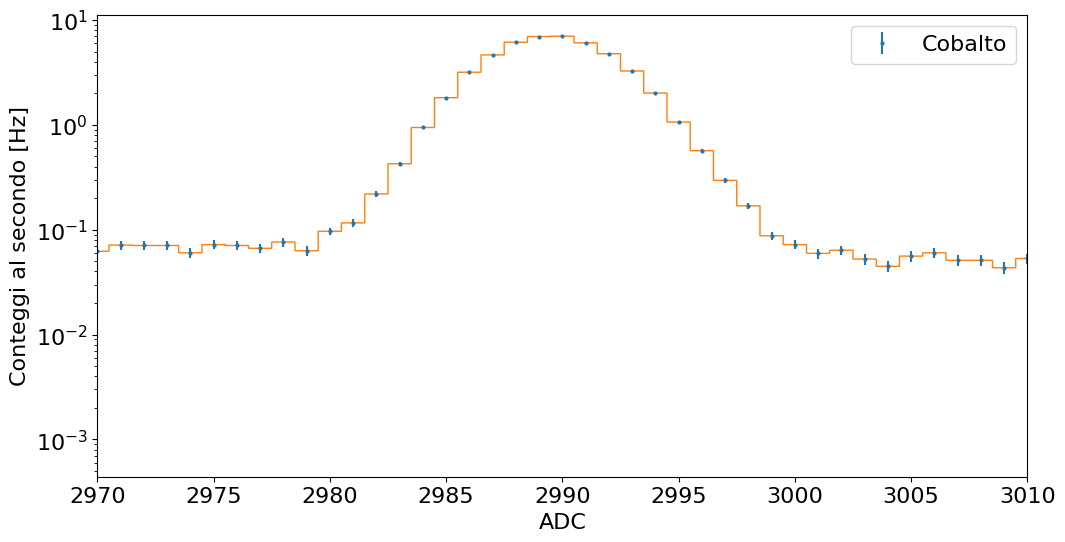

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = cobalto.adc, y = cobalto.rate, yerr = cobalto.rate_err, ls = "None", marker = "o", ms = 2, label = "Cobalto")
ax.stairs(cobalto.rate, cobalto.bin_edges)
ax.set_yscale("log")
ax.set_xlim(np.argmax(cobalto.counts)-20, np.argmax(cobalto.counts)+20)
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi al secondo [Hz]")
ax.legend()

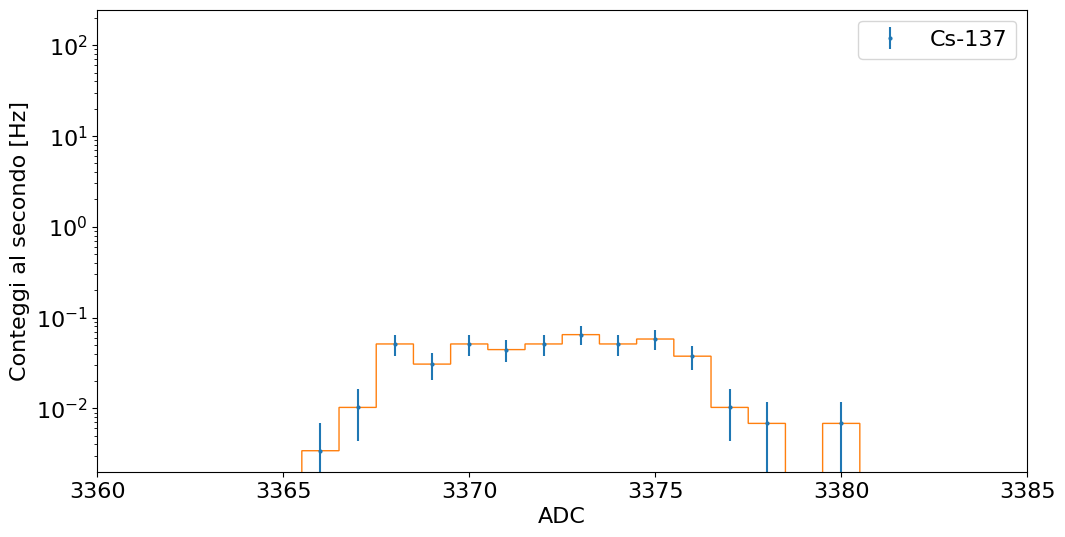

In [13]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = cesio_0cm.adc, y = cesio_0cm.rate, yerr = cesio_0cm.rate_err, ls = "None", marker = "o", ms = 2, label = "Cs-137")
ax.stairs(cesio_0cm.rate, cesio_0cm.bin_edges)
ax.set_yscale("log")
#ax.set_xlim(np.argmax(cesio_0cm.counts)-20, np.argmax(cesio_0cm.counts)+20)
ax.set_xlim(3360, 3385)
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi al secondo [Hz]")
ax.legend()

In [26]:
adc = np.array([1684, 3373])
E = np.array([660, 1460])

m = (E[1] - E[0]) / (adc[1] - adc[0])
q = - adc[1] * m + E[1]
m, q

(0.47365304914150386, -137.63173475429244)

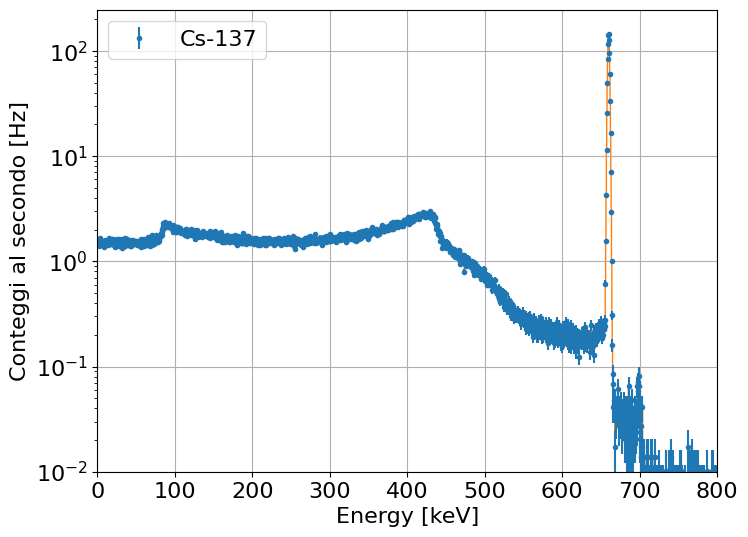

In [35]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.errorbar(x = cesio_0cm.adc*m+q, y = cesio_0cm.rate, yerr = cesio_0cm.rate_err, ls = "None", marker = "o", ms = 3, label = "Cs-137")
ax.stairs(cesio_0cm.rate, cesio_0cm.bin_edges*m+q)
ax.set_yscale("log")
#ax.set_xlim(np.argmax(cesio_0cm.counts)-20, np.argmax(cesio_0cm.counts)+20)
#ax.set_xlim(3360, 3385)
ax.set_xlim(0, 800)
ax.set_ylim(bottom = 1e-2)
ax.set_xlabel("Energy [keV]")
ax.set_ylabel("Conteggi al secondo [Hz]")
ax.grid()
ax.legend();